## Sleep Records

In [17]:
import pandas as pd
import numpy as np
from LabData.DataLoaders.ItamarSleepLoader import ItamarSleepLoader

study_ids = [10, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008]

sl =ItamarSleepLoader().get_data(study_ids=study_ids)
df_sleep = sl.df

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

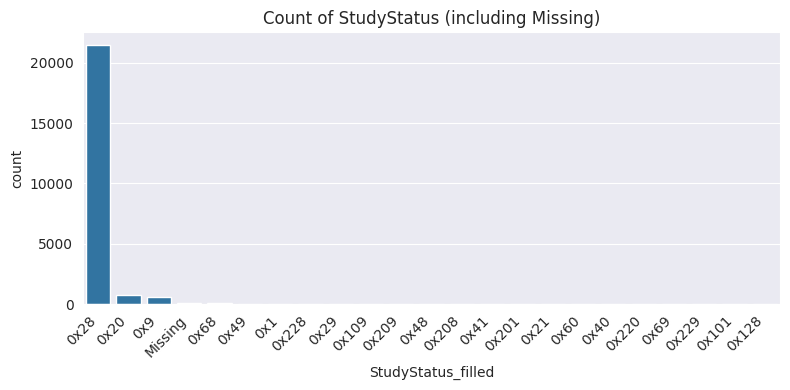

In [14]:
# 1) Fill NaN with "Missing"
df_sleep["StudyStatus_filled"] = df_sleep["StudyStatus"].fillna("Missing")

# 2) Build an ordered list of statuses that actually occur
status_counts = df_sleep["StudyStatus_filled"].value_counts()
valid_statuses = status_counts[status_counts > 0].index  # or .keys()

# 3) Plot, restricting to valid categories and rotating labels
plt.figure(figsize=(8,4))
sns.countplot(data=df_sleep, x="StudyStatus_filled", order=valid_statuses)
plt.xticks(rotation=45, ha="right")
plt.title("Count of StudyStatus (including Missing)")
plt.tight_layout()
plt.show()


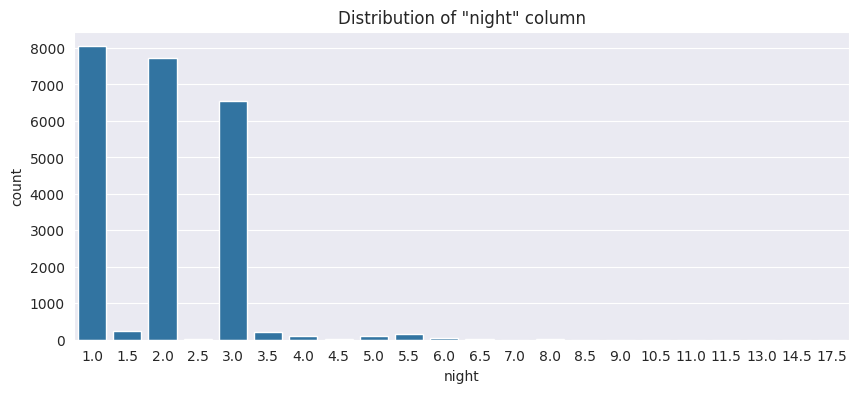

In [15]:
# In [3]:  Distribution of nights
plt.figure(figsize=(10,4))
sns.countplot(data=df_sleep, x='night')
plt.title('Distribution of "night" column')
plt.show()


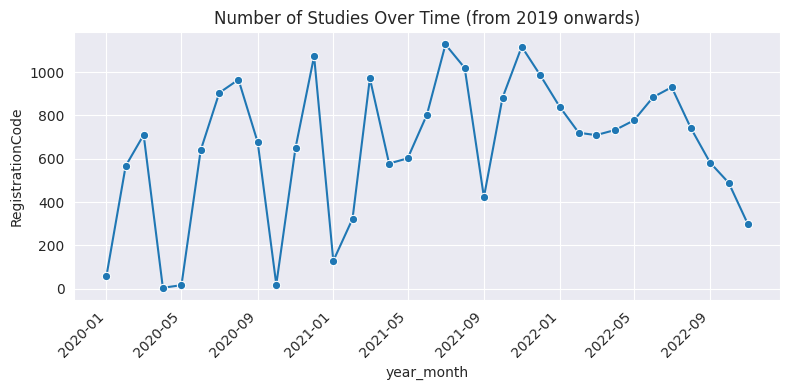

In [18]:
# In [4]: Studies over time (line plot by month)
# First convert Date to datetime, if not already
df_sleep = df_sleep.reset_index()
df_sleep['Date'] = pd.to_datetime(df_sleep['Date'], errors='coerce')

# Convert to period and then to timestamp (representing the first day of the month)
df_sleep['year_month'] = df_sleep['Date'].dt.to_period('M').dt.to_timestamp()

# Filter out dates before 2019
df_sleep = df_sleep[df_sleep['year_month'].dt.year >= 2018]

# Group by the new column and count the number of RegistrationCode entries per month
counts = df_sleep.groupby('year_month')['RegistrationCode'].count().reset_index()

# Plot the lineplot with proper rotation for clarity
plt.figure(figsize=(8, 4))
sns.lineplot(data=counts, x='year_month', y='RegistrationCode', marker='o')
plt.xticks(rotation=45, ha="right")
plt.title('Number of Studies Over Time (from 2019 onwards)')
plt.tight_layout()
plt.show()



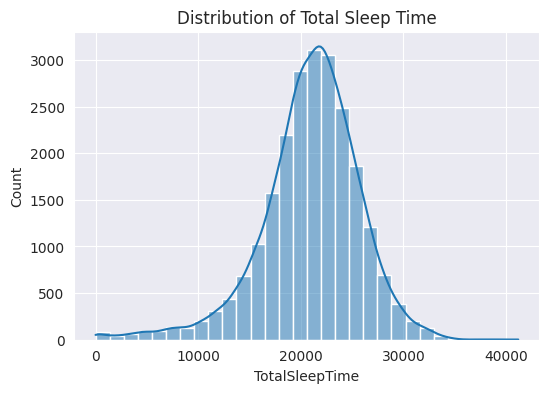

In [7]:
# In [5]:  Histogram of TotalSleepTime
plt.figure(figsize=(6,4))
sns.histplot(data=df_sleep, x='TotalSleepTime', bins=30, kde=True)
plt.title('Distribution of Total Sleep Time')
plt.show()


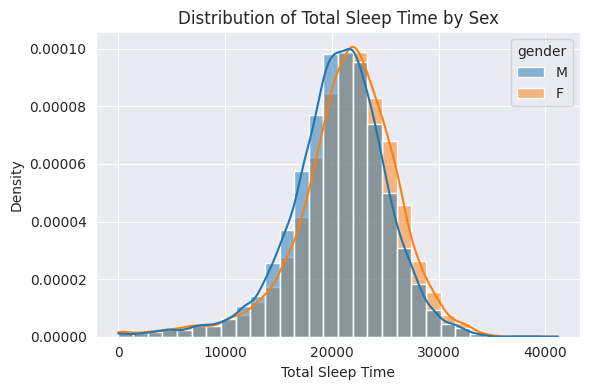

In [19]:
metadata = sl.df_metadata
metadata = metadata.reset_index()
id_gender = metadata[['RegistrationCode', 'Date', 'gender','StudyTypeID']]
# Merge the gender information into df on 'RegistrationCode'
df_sleep = df_sleep.merge(id_gender[['RegistrationCode', 'gender']], on='RegistrationCode', how='left')
# Or after merging
df_sleep['gender'] = df_sleep['gender'].map({1.0: 'M', 0.0: 'F'})

plt.figure(figsize=(6,4))
sns.histplot(
    data=df_sleep,
    x='TotalSleepTime',
    bins=30,
    kde=True,
    hue='gender',       # adjust the column name if needed (e.g. 'Gender')
    stat='density',  # normalize each histogram to density
    common_norm=False  # normalize each group separately
)
plt.title('Distribution of Total Sleep Time by Sex')
plt.xlabel('Total Sleep Time')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


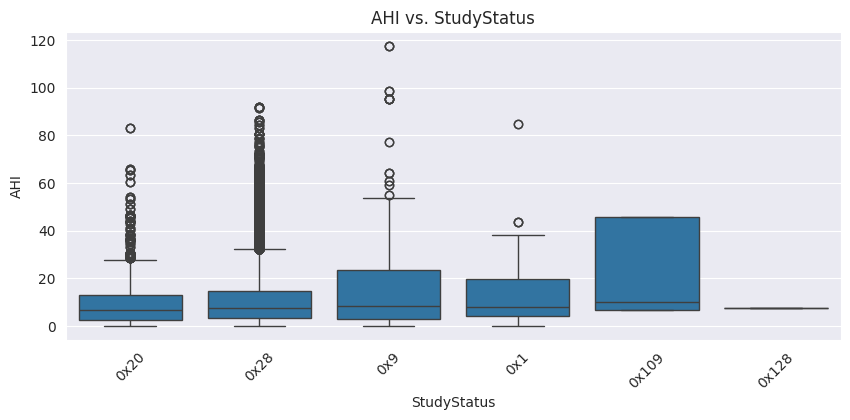

In [12]:
# In [6]:  Boxplot of AHI grouped by StudyStatus
# Filter StudyStatus values that have AHI data points
valid_statuses = df_sleep.groupby('StudyStatus')['AHI'].count()
valid_statuses = valid_statuses[valid_statuses > 0].index

# Plot only the valid statuses
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_sleep[df_sleep['StudyStatus'].isin(valid_statuses)], x='StudyStatus', y='AHI')
plt.title('AHI vs. StudyStatus')
plt.xticks(rotation=45)  # Rotate for readability if needed
plt.show()



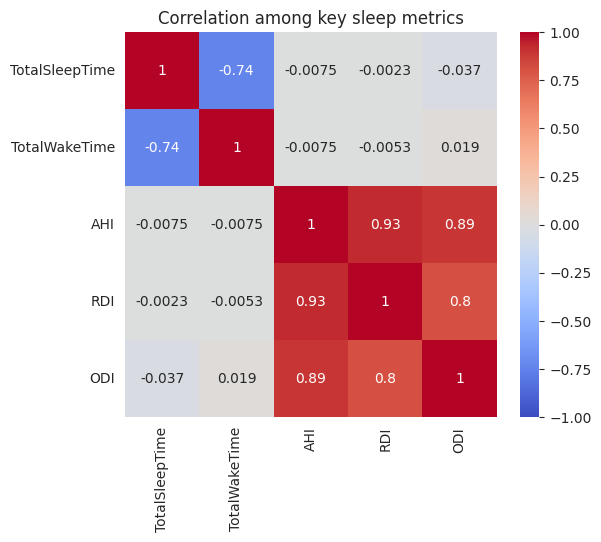

In [13]:
# In [7]:  Correlation heatmap of selected numeric columns
plt.figure(figsize=(6,5))
cols_of_interest = ['TotalSleepTime','TotalWakeTime','AHI','RDI','ODI']
corr = df_sleep[cols_of_interest].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation among key sleep metrics')
plt.show()



In [35]:
df_datapoint_n = df_sleep['RegistrationCode'].value_counts().reset_index()
df_datapoint_n.columns = ['RegistrationCode', 'numbers']

# Sort the dataframe by 'numbers' in descending order
df_datapoint_n = df_datapoint_n.sort_values(by='numbers', ascending=False)

# Print the max and min
max_count = df_datapoint_n['numbers'].max()
min_count = df_datapoint_n['numbers'].min()
unique_ids = df_datapoint_n.shape[0]

print(f"Max count: {max_count}")
print(f"Min count: {min_count}")
print(f"Unique IDs: {unique_ids}")


Max count: 36
Min count: 1
Unique IDs: 8275


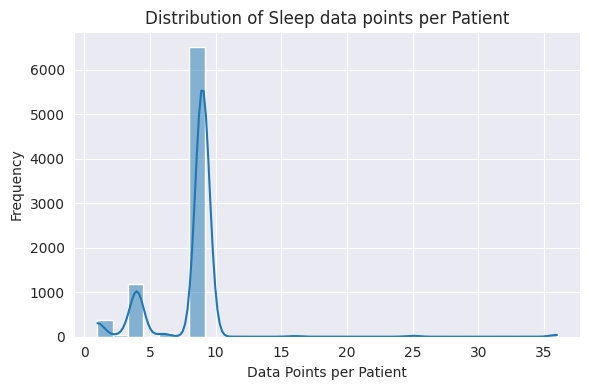

In [36]:
plt.figure(figsize=(6,4))
sns.histplot(data=df_datapoint_n, x='numbers', bins=30, kde=True)
plt.title('Distribution of Sleep data points per Patient')
plt.xlabel('Data Points per Patient')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Continuos Glucose Monitor (CGM)

In [10]:
from LabData.DataLoaders.CGMLoader import CGMLoader
study_ids = [10, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008]

cgm =CGMLoader().get_data(study_ids=study_ids)
df_cgm = cgm.df

In [32]:
df_cgm = df_cgm.reset_index()
df_datapoint_n = df_cgm['RegistrationCode'].value_counts().reset_index()
df_datapoint_n.columns = ['RegistrationCode', 'numbers']

# Sort the dataframe by 'numbers' in descending order
df_datapoint_n = df_datapoint_n.sort_values(by='numbers', ascending=False)

# Print the max and min
max_count = df_datapoint_n['numbers'].max()
min_count = df_datapoint_n['numbers'].min()
unique_ids = df_datapoint_n.shape[0]

print(f"Max count: {max_count}")
print(f"Min count: {min_count}")
print(f"Unique IDs: {unique_ids}")


Max count: 3733
Min count: 281
Unique IDs: 10854


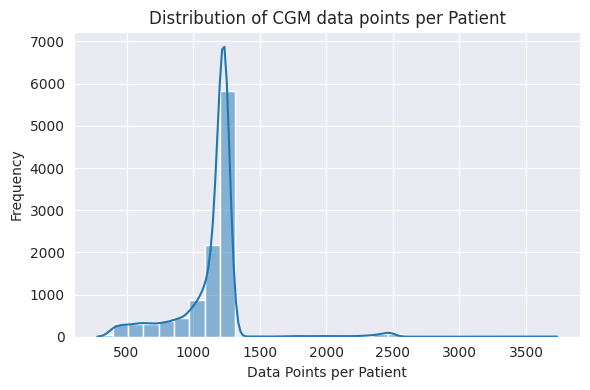

In [34]:
plt.figure(figsize=(6,4))
sns.histplot(data=df_datapoint_n, x='numbers', bins=30, kde=True)
plt.title('Distribution of CGM data points per Patient')
plt.xlabel('Data Points per Patient')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

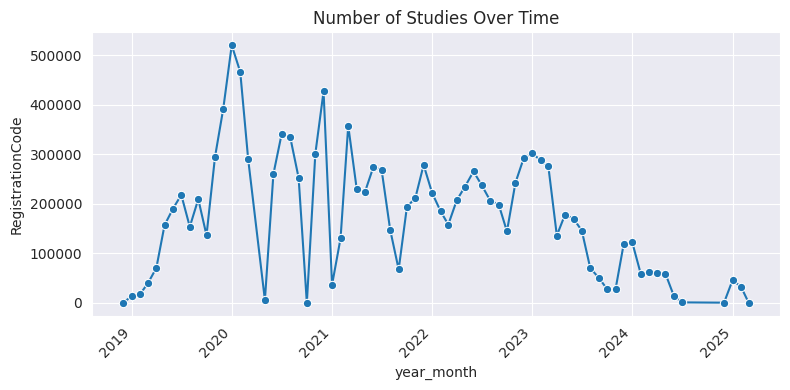

In [12]:
df_cgm = df_cgm.reset_index()
df_cgm['Date'] = pd.to_datetime(df_cgm['Date'], errors='coerce')

# Convert to period and then to timestamp (representing the first day of the month)
df_cgm['year_month'] = df_cgm['Date'].dt.to_period('M').dt.to_timestamp()

# Group by the new column and count the number of RegistrationCode entries per month
counts = df_cgm.groupby('year_month')['RegistrationCode'].count().reset_index()

# Plot the lineplot with proper rotation for clarity
plt.figure(figsize=(8,4))
sns.lineplot(data=counts, x='year_month', y='RegistrationCode', marker='o')
plt.xticks(rotation=45, ha="right")
plt.title('Number of Studies Over Time')
plt.tight_layout()
plt.show()

In [20]:
df_sleep.head(3)

,RegistrationCode,night,Date,StudyStatus,Warnings,BraceletMessage,StudyStartTime,StudyEndTime,TotalApneaSleepTime,TotalAH_CentralValidSleepTime,...,year,PhysicalSleepTime,PhysicalWakeTime,%DeepSleep,%REM,%LightSleep,%Wake,%Sleep,year_month,gender
0,10K_1000942861,1.0,2021-12-16 23:14:24,0x20,NaN,NaN,83664.0,40464.0,28015.0,NaN,...,2021,2021-12-16 23:26:19.231788079,2021-12-17 08:07:45.854304635,18.684838,25.833541,55.481621,34.946759,65.053241,2021-12-01,M
1,10K_1000942861,1.0,2021-12-16 23:14:24,0x20,NaN,NaN,83664.0,40464.0,28015.0,NaN,...,2021,2021-12-16 23:26:19.231788079,2021-12-17 08:07:45.854304635,18.684838,25.833541,55.481621,34.946759,65.053241,2021-12-01,M
2,10K_1000942861,2.0,2021-12-25 22:54:26,0x20,NaN,NaN,82466.0,39266.0,25885.0,NaN,...,2021,2021-12-25 23:03:58.185430463,2021-12-26 08:16:11.298013245,17.777013,29.583763,52.639223,39.437500,60.562500,2021-12-01,M


In [21]:
df_cgm.head(3)

,index,RegistrationCode,ConnectionID,Date,GlucoseValue,PPGR,year_month
0,0,10K_1000942861,5285357363,2021-12-14 09:26:00,109.8,10.8,2021-12-01
1,1,10K_1000942861,5285357363,2021-12-14 09:41:00,120.6,0.0,2021-12-01
2,2,10K_1000942861,5285357363,2021-12-14 09:56:00,136.8,0.0,2021-12-01


In [25]:

# 1) Ensure dates are datetime
df_sleep['Date'] = pd.to_datetime(df_sleep['Date'], errors='coerce')
df_cgm['Date']   = pd.to_datetime(df_cgm['Date'], errors='coerce')

# 2) Merge on RegistrationCode
merged = pd.merge(
    df_sleep[['RegistrationCode', 'Date']],
    df_cgm[['RegistrationCode', 'Date']],
    on='RegistrationCode',
    how='inner',
    suffixes=('_sleep','_cgm')
)

# 3) Compute absolute difference in days
merged['date_diff_days'] = (
    (merged['Date_sleep'] - merged['Date_cgm']).abs().dt.days
)

# 4) Filter to keep only rows with <= 2 days difference
filtered = merged[merged['date_diff_days'] <= 2]

# 5) Group by RegistrationCode and count how many overlaps
df_sleep_cgm_count = (
    filtered.groupby('RegistrationCode')
            .size()
            .reset_index(name='overlap_count')
)


In [26]:
df_sleep_cgm_count.head()

,RegistrationCode,overlap_count
0,10K_1000942861,1912
1,10K_1002254441,4755
2,10K_1003113258,1604
3,10K_1007330152,5184
4,10K_1008294272,3495


In [27]:
# Print the max and min
max_count = df_sleep_cgm_count['overlap_count'].max()
min_count = df_sleep_cgm_count['overlap_count'].min()
unique_ids = df_sleep_cgm_count.shape[0]

print(f"Max count: {max_count}")
print(f"Min count: {min_count}")
print(f"Unique IDs: {unique_ids}")

Max count: 16566
Min count: 15
Unique IDs: 5718


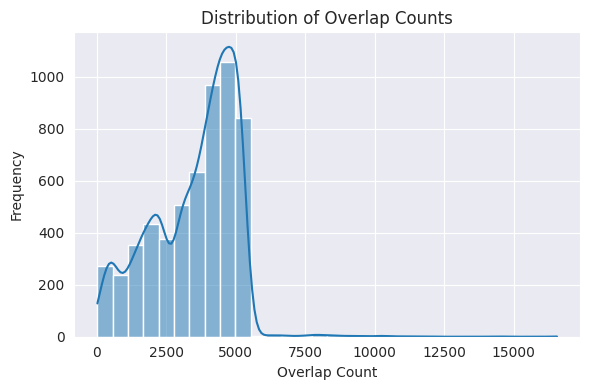

In [29]:
plt.figure(figsize=(6,4))
sns.histplot(data=df_sleep_cgm_count, x='overlap_count', bins=30, kde=True)
plt.title('Distribution of Overlap Counts')
plt.xlabel('Overlap Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()